##**CARGA DE PAQUETERIAS Y DATOS**##

In [ ]:
pip install dataprep

In [5]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pylab as plt
import scipy.stats.distributions as dist
import scipy.stats as stats
import io
from google.colab import files
from dataprep.eda import create_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
uploaded = files.upload()

Saving Hipotecas_datos.xlsx to Hipotecas_datos.xlsx


In [7]:
df = pd.read_excel('Hipotecas_datos.xlsx')  
df.head() # Datos 

Ingresos(millonesde dólares)  Valor(millonesde dólares)  ...  hipoteca  sexo
0                          40.3                      190.0  ...     230.0   1.0
1                          39.6                      121.0  ...     370.0   1.0
2                          40.8                      161.0  ...     397.0   1.0
3                          40.3                      161.0  ...     181.0   1.0
4                          40.0                      179.0  ...     378.0   0.0

[5 rows x 6 columns]

In [8]:
df.info()# Variables Continuas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ingresos(millonesde dólares)  25 non-null     float64
 1   Valor(millonesde dólares)     25 non-null     float64
 2   Años_educación                25 non-null     float64
 3   Pago_Edad                     25 non-null     float64
 4   hipoteca                      25 non-null     float64
 5   sexo                          25 non-null     float64
dtypes: float64(6)
memory usage: 1.3 KB


In [9]:
df.describe() # Medidas de Dispersión 

Ingresos(millonesde dólares)  ...       sexo
count                     25.000000  ...  25.000000
mean                      39.928000  ...   0.560000
std                        1.051396  ...   0.506623
min                       37.100000  ...   0.000000
25%                       39.600000  ...   0.000000
50%                       40.300000  ...   1.000000
75%                       40.600000  ...   1.000000
max                       41.700000  ...   1.000000

[8 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/dask/utils.py:893: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  return getattr(obj, self.method)(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/dask/utils.py:893: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  return getattr(obj, self.method)(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/dask/utils.py:893: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  return getattr(obj, self.method)(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/dask/utils.py:893: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  return getattr(obj, self.method)(*args, **kwargs)
Computing apply-39b8cb79696e50814ba283ffaf725d5e:   0%|          | 0/910 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/dask/uti

DataPrep Report
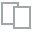
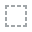
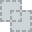
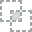
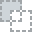
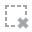
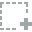
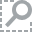
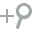
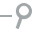
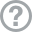
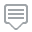
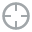
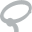
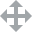
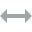
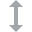
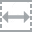
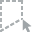
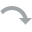
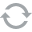
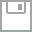
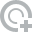
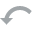
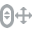
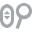
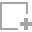
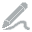
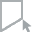
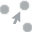
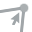
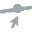

In [10]:
create_report(df) # Analisis Exloratorio de Datos (EDA)

1. De acuerdo con la información descrita en la etapa anterior y el material consultado en esta unidad, planteen la hipótesis nula y alternativa que apoye al objetivo del Banco XYZ, el cual es conocer cómo factores tales como el valor de la casa (en miles de dólares), el nivel de educación, la edad de quien encabeza la familia, el pago actual de hipoteca al mes (en dólares) y el género de una persona (masculino=1, femenino=0) se relacionan con el ingreso familiar (en miles de dólares).




**Tabla de Correlacion de Pearson**

In [11]:
corr = df.corr() # Correlacion Pearson 
corr

Ingresos(millonesde dólares)  ...      sexo
Ingresos(millonesde dólares)                      1.000000  ...  0.485612
Valor(millonesde dólares)                         0.719650  ...  0.184103
Años_educación                                    0.188044  ...  0.061944
Pago_Edad                                         0.242555  ...  0.155778
hipoteca                                          0.115726  ... -0.128950
sexo                                              0.485612  ...  1.000000

[6 rows x 6 columns]

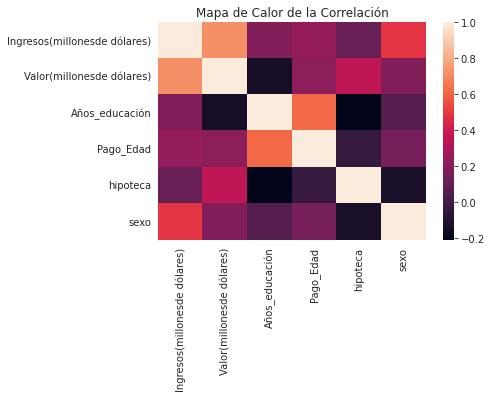

In [12]:
sns.heatmap(corr).set(title= 'Mapa de Calor de la Correlación')
plt.show()

In [13]:
def ttest_corr(r, n, a): # r = Coefciente de correlación 
                         # n = Grados de Libertad 
                         # a = Nivel de Confianza  
  t = r / np.sqrt((1 - r**2) / (n-2))
  
  neg_a = stats.t.ppf(q=a/2,
            df= n-2)
  
  pos_a = stats.t.ppf(q= 1 - (a/2),
            df= n-2)
  
  if t > pos_a:
    print('Se rechaza la Hipotesis Nula')
  elif t < neg_a:
    print('Se rechaza la Hipotesis Nula')
  else:
    print('Se acepta la Hipotesis Nula')
  
  return(t)

In [14]:
n = len(df) # Grados de Libertad
r = corr.loc['Ingresos(millonesde dólares)','Valor(millonesde dólares)'] #Coeficiente de Correlación
a = .05 # Nivel de Confianza

In [15]:
for i, columns in zip(corr.loc['Ingresos(millonesde dólares)',:], corr.columns):
    print( columns, ttest_corr(i, n, a)) # Prueba de Hipoteis de correlacion de Variables 

Se rechaza la Hipotesis Nula
Ingresos(millonesde dólares) inf
Se rechaza la Hipotesis Nula
Valor(millonesde dólares) 4.970672328900695
Se acepta la Hipotesis Nula
Años_educación 0.9182065178490464
Se acepta la Hipotesis Nula
Pago_Edad 1.199060974595229
Se acepta la Hipotesis Nula
hipoteca 0.5587560190836838
Se rechaza la Hipotesis Nula
sexo 2.66412912811562


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


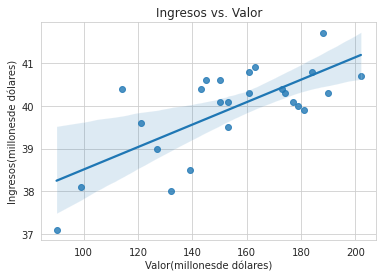

In [16]:
x = df['Valor(millonesde dólares)']
y = df['Ingresos(millonesde dólares)']
sns.regplot(x=x, y=y).set(title= 'Ingresos vs. Valor')
plt.show()

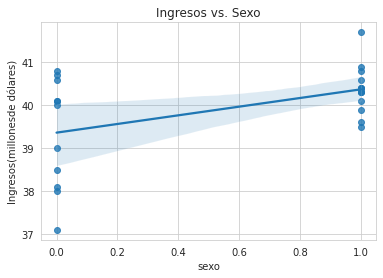

In [17]:
x_2 = df['sexo']
y = df['Ingresos(millonesde dólares)']
sns.regplot(x=x_2, y=y).set(title= 'Ingresos vs. Sexo')
plt.show()

# Regresión Lineal 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [21]:
y_1 = df['Ingresos(millonesde dólares)'].values
x_1 = df[['Valor(millonesde dólares)', 'sexo']].values

In [23]:
x_1train, x_1test, y_1train, y_1test = train_test_split(x_1, y_1, test_size=0.1, random_state=3)
print("number of test samples :", x_1test.shape[0])
print("number of training samples:",x_1train.shape[0])

number of test samples : 3
number of training samples: 22


In [33]:
lr_1 = LinearRegression()

In [34]:
lr_1.fit(x_1train, y_1train)

LinearRegression()

In [35]:
lr_1.intercept_

36.24982971192314

In [36]:
lr_1.coef_

array([0.02170571, 0.62663216])

In [37]:
lr_1.score(x_1test, y_1test)

0.7393362855443523

In [29]:
X_1 = df[['Valor(millonesde dólares)', 'sexo']]

In [39]:
Y_hat_1 = lr_1.predict(X_1)
Y_hat_1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([41.00054611, 39.50285236, 40.37108062, 40.37108062, 40.13515118,
       38.39869466, 39.35091242, 40.63438243, 40.24367971, 38.2033433 ,
       40.80519475, 39.98037791, 39.11498297, 39.00645444, 40.19743497,
       40.02378932, 40.65325481, 40.09173976, 40.9571347 , 40.19743497,
       39.50568569, 40.6315491 , 40.41449204, 39.50568569, 39.26692292])

In [43]:
df['Y_hat'] = Y_hat_1
df.head()

Ingresos(millonesde dólares)  Valor(millonesde dólares)  ...  sexo      Y_hat
0                          40.3                      190.0  ...   1.0  41.000546
1                          39.6                      121.0  ...   1.0  39.502852
2                          40.8                      161.0  ...   1.0  40.371081
3                          40.3                      161.0  ...   1.0  40.371081
4                          40.0                      179.0  ...   0.0  40.135151

[5 rows x 7 columns]

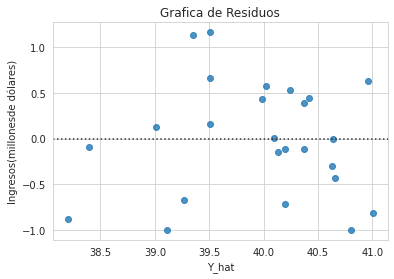

In [41]:
sns.residplot(data=df, x=df['Y_hat'], y=df['Ingresos(millonesde dólares)']).set(title='Grafica de Residuos')
plt.show()

In [61]:
diff = ( df['Y_hat']/df['Ingresos(millonesde dólares)']) -1 

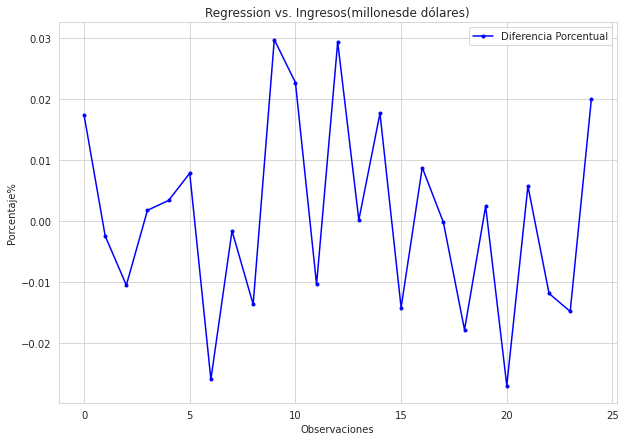

In [62]:
plt.figure(figsize=(10,7))
plt.title('Regression vs. Ingresos(millonesde dólares)')

plt.xlabel('Observaciones')
plt.ylabel('Porcentaje%')
plt.plot(diff, 'b.-', label='Diferencia Porcentual')

plt.legend()
plt.show()

In [63]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel(RedName)
    plt.ylabel(BlueName)

    plt.legend()
    plt.show()
    plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


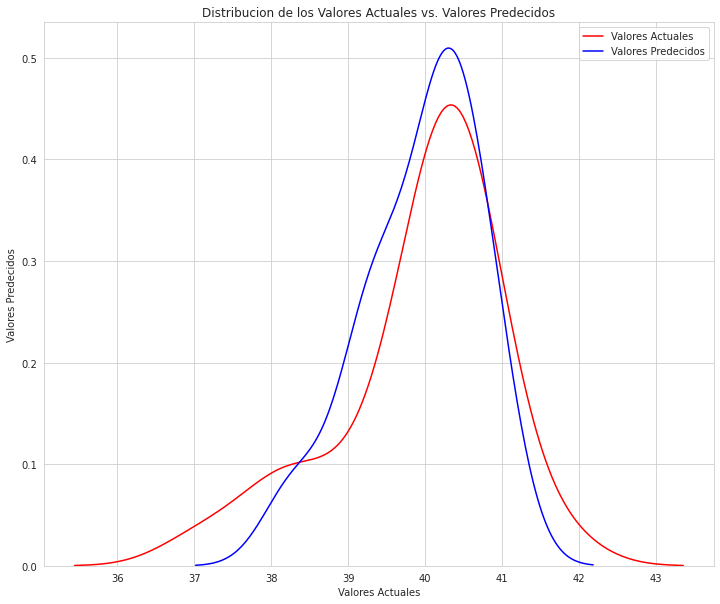

In [64]:
Title = 'Distribucion de los Valores Actuales vs. Valores Predecidos'
DistributionPlot(df['Ingresos(millonesde dólares)'], df['Y_hat'],
                 "Valores Actuales", "Valores Predecidos", Title)
plt.show()

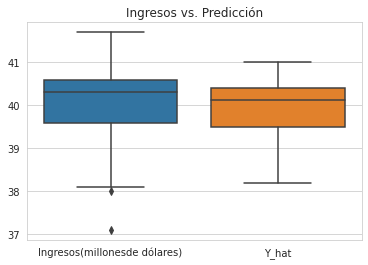

In [65]:
sns.boxplot(data=df[['Ingresos(millonesde dólares)','Y_hat']]).set(title= 'Ingresos vs. Predicción')
plt.show()

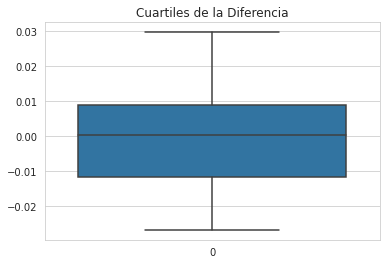

In [66]:
sns.boxplot(data=diff).set(title= 'Cuartiles de la Diferencia')
plt.show()

In [67]:
df[['Ingresos(millonesde dólares)', 'Y_hat']].describe()

Ingresos(millonesde dólares)      Y_hat
count                     25.000000  25.000000
mean                      39.928000  39.942554
std                        1.051396   0.752229
min                       37.100000  38.203343
25%                       39.600000  39.502852
50%                       40.300000  40.135151
75%                       40.600000  40.414492
max                       41.700000  41.000546